### Import libraries

In [18]:
import pandas as pd
from io import BytesIO
import requests
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import os 
import sqlite3
import logging
import sys
import seaborn as sns

### Load data from Databases

In [19]:
try:
    connectionweather = sqlite3.connect("../data/rainweather.sqlite")
    crashdatabase16 = sqlite3.connect("../data/crashes2016.sqlite")
    crashdatabase17 = sqlite3.connect("../data/crashes2017.sqlite")
    crashdatabase18 = sqlite3.connect("../data/crashes2018.sqlite")
    crashdatabase19 = sqlite3.connect("../data/crashes2019.sqlite")
    crashdatabase20 = sqlite3.connect("../data/crashes2020.sqlite")
    crashdatabase21 = sqlite3.connect("../data/crashes2021.sqlite")
    crashdatabase22 = sqlite3.connect("../data/crashes2022.sqlite") 
    weather_df = pd.read_sql_query("SELECT * FROM rainweather", connectionweather) 
    crash_df_16 = pd.read_sql_query("SELECT * FROM crashes", crashdatabase16)
    crash_df_17 = pd.read_sql_query("SELECT * FROM crashes", crashdatabase17) 
    crash_df_18 = pd.read_sql_query("SELECT * FROM crashes", crashdatabase18) 
    crash_df_19 = pd.read_sql_query("SELECT * FROM crashes", crashdatabase19) 
    crash_df_20 = pd.read_sql_query("SELECT * FROM crashes", crashdatabase20) 
    crash_df_21 = pd.read_sql_query("SELECT * FROM crashes", crashdatabase21)
    crash_df_22 = pd.read_sql_query("SELECT * FROM crashes", crashdatabase22)   
except sqlite3.Error as e:
    logging.error(msg=f"Error while creating SQLite DB: {e}")
    sys.exit(1)
finally:
    connectionweather.close()
    crashdatabase16.close()
    crashdatabase17.close()
    crashdatabase18.close()
    crashdatabase19.close()
    crashdatabase20.close()
    crashdatabase21.close()
    crashdatabase22.close()

In [20]:
def plot_monthly_rainfall(monthly_rainfall, location): 
    plt.figure(figsize=(12, 6))
    
    # X-Achse setzen
    x_ticks_labels = [f"{year}-{month:02}" if (month == 1 or month == 6) else '' for year, month in zip(monthly_rainfall['YEAR'], monthly_rainfall['MONTH'])]
    
    # Datenpunkte plotten
    plt.plot(range(len(monthly_rainfall)), monthly_rainfall['RAINFALL'], marker='o', label='Rainfall')
    
    # Alle leeren Daten mit roten X markieren
    missing_data_indices = np.nonzero(monthly_rainfall['RAINFALL'].isnull())[0]
    plt.scatter(missing_data_indices, np.zeros_like(missing_data_indices), marker='x', color='red', label='Missing Data')
    
    # Location ('LOCATION') in den Titel schreiben
    title = f'Monthly Rainfall Sum of {location} in mm' 
    plt.title(title)
    
    # Setze die ticks der X-Achse und Legende
    plt.xticks(range(len(monthly_rainfall)), x_ticks_labels, rotation=45, ha='right') 
    plt.legend()

    return plt 

In [21]:
 # Gruppiere mit YEAR und MONAT und summiere den RAINFALL und resette den index. Hol die Location aus der Datenbank 

location = weather_df['LOCATION'].iloc[0]
monthly_rainfall = weather_df.groupby(['YEAR', 'MONTH'])['RAINFALL'].sum().reset_index() 
monthly_rainfall['KEY']=monthly_rainfall['YEAR'].astype(str)+'-'+monthly_rainfall['MONTH'].astype(str)
monthly_rainfall

,YEAR,MONTH,RAINFALL,KEY
0,1997,7,104.2,1997-7
1,1997,8,99.7,1997-8
2,1997,9,15.8,1997-9
3,1997,10,65.2,1997-10
4,1997,11,18.3,1997-11
...,...,...,...,...
301,2022,8,110.2,2022-8
302,2022,9,91.6,2022-9
303,2022,10,88.2,2022-10
304,2022,11,56.4,2022-11


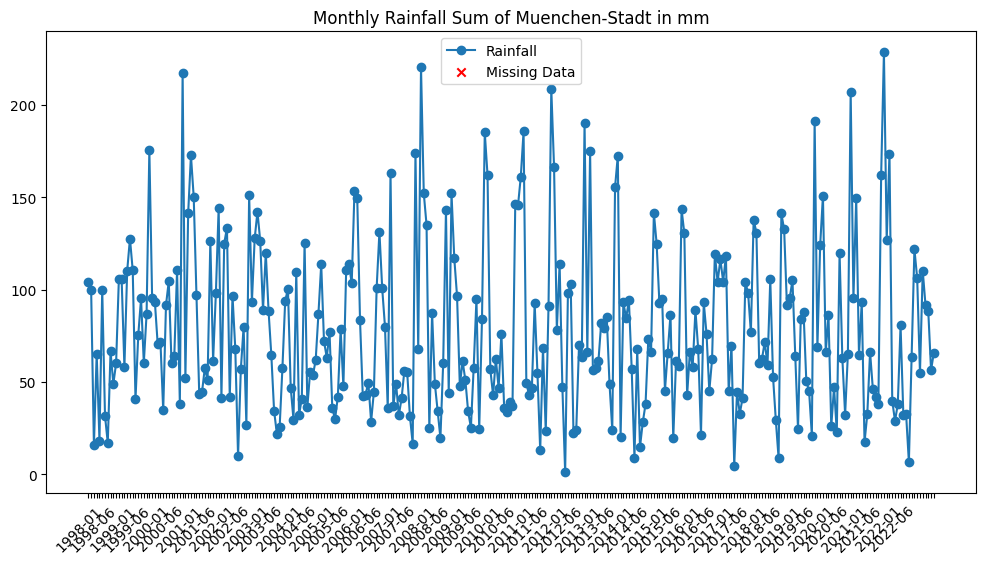

In [22]:
plot = plot_monthly_rainfall(monthly_rainfall, location)

In [23]:
def get_filtered_and_grouped_data_bicyle_accident(accident_df, uland_param, uregbez_param, year): 
    # Filtere die Daten
    filtered_data = accident_df[(accident_df['ULAND'] == uland_param) & (accident_df['UREGBEZ'] == uregbez_param) & (accident_df['IstRad'] == 1)]

    # Gruppiere nach monat und summiere die Crashes 
    grouped_data = filtered_data.groupby('UMONAT')['OBJECTID'].count().reset_index()
    grouped_data['YEAR'] = year 
    grouped_data.columns = ['MONTH', 'TOTALCRASHES','YEAR']  

    return grouped_data

In [24]:
land = 9
regbez = 7

monthly_crash_16 = get_filtered_and_grouped_data_bicyle_accident(accident_df=crash_df_16,uland_param=land,uregbez_param=regbez,year=2016) 
monthly_crash_17 = get_filtered_and_grouped_data_bicyle_accident(accident_df=crash_df_17,uland_param=land,uregbez_param=regbez,year=2017) 
monthly_crash_18 = get_filtered_and_grouped_data_bicyle_accident(accident_df=crash_df_18,uland_param=land,uregbez_param=regbez,year=2018) 
monthly_crash_19 = get_filtered_and_grouped_data_bicyle_accident(accident_df=crash_df_19,uland_param=land,uregbez_param=regbez,year=2019) 
monthly_crash_20 = get_filtered_and_grouped_data_bicyle_accident(accident_df=crash_df_20,uland_param=land,uregbez_param=regbez,year=2020) 
monthly_crash_21 = get_filtered_and_grouped_data_bicyle_accident(accident_df=crash_df_21,uland_param=land,uregbez_param=regbez,year=2021) 
monthly_crash_22 = get_filtered_and_grouped_data_bicyle_accident(accident_df=crash_df_22,uland_param=land,uregbez_param=regbez,year=2022) 

monthly_crash = pd.concat([monthly_crash_16,monthly_crash_17,monthly_crash_18,monthly_crash_19,monthly_crash_20,monthly_crash_21,monthly_crash_22])
monthly_crash['KEY']=monthly_crash['YEAR'].astype(str)+'-'+monthly_crash['MONTH'].astype(str)
monthly_crash

,MONTH,TOTALCRASHES,YEAR,KEY
0,1,75,2016,2016-1
1,2,75,2016,2016-2
2,3,97,2016,2016-3
3,4,138,2016,2016-4
4,5,223,2016,2016-5
...,...,...,...,...
7,8,332,2022,2022-8
8,9,233,2022,2022-9
9,10,254,2022,2022-10
10,11,145,2022,2022-11


In [25]:
def plot_monthly_crash(monthly_crash, location): 
    plt.figure(figsize=(12, 6))
    
    # X-Achse setzen
    x_ticks_labels = [f"{year}-{month:02}" if (month == 1 or month == 6) else '' for year, month in zip(monthly_crash['YEAR'], monthly_crash['MONTH'])]
    
    # Datenpunkte plotten
    plt.plot(range(len(monthly_crash)), monthly_crash['TOTALCRASHES'], marker='o', label='TOTALCRASHES')
    
    # Alle leeren Daten mit roten X markieren
    missing_data_indices = np.nonzero(monthly_crash['TOTALCRASHES'].isnull())[0]
    plt.scatter(missing_data_indices, np.zeros_like(missing_data_indices), marker='x', color='red', label='Missing Data')
    
    # Location ('LOCATION') in den Titel schreiben
    title = f'Monthly Crashes of {location}' 
    plt.title(title)
    
    # Setze die ticks der X-Achse und Legende
    plt.xticks(range(len(monthly_crash)), x_ticks_labels, rotation=45, ha='right') 
    plt.legend()

    return plt 

<module 'matplotlib.pyplot' from 'd:\\Uni_Erlangen\\Masterstudiengang\\MADE-Projekt\\MADE-project\\venv\\lib\\site-packages\\matplotlib\\pyplot.py'>

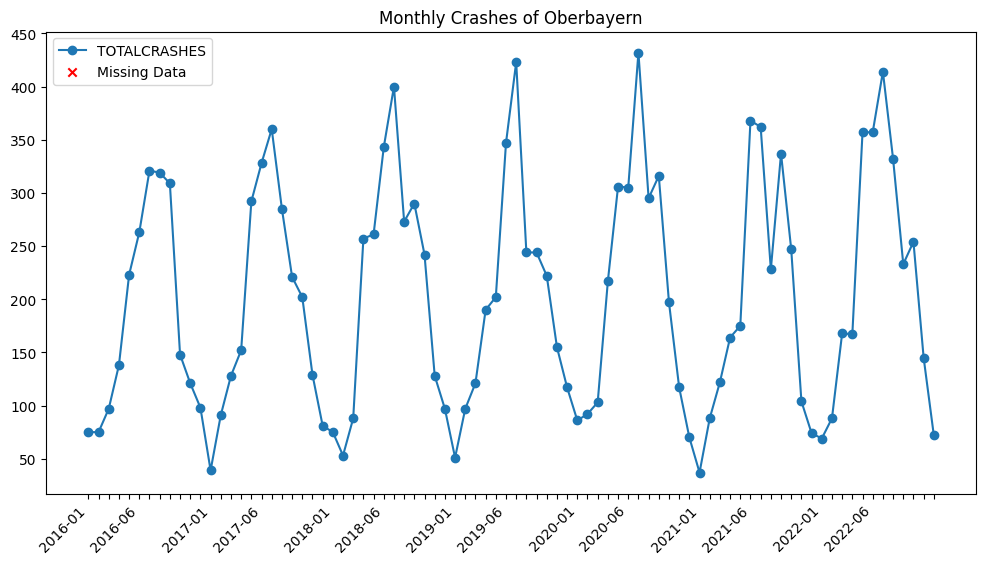

In [26]:
plot_monthly_crash(monthly_crash, 'Oberbayern')

In [27]:
merged_df = pd.merge(monthly_crash, monthly_rainfall, on='KEY', how='inner')
merged_df

,MONTH_x,TOTALCRASHES,YEAR_x,KEY,YEAR_y,MONTH_y,RAINFALL
0,1,75,2016,2016-1,2016,1,93.1
1,2,75,2016,2016-2,2016,2,76.1
2,3,97,2016,2016-3,2016,3,45.1
3,4,138,2016,2016-4,2016,4,62.2
4,5,223,2016,2016-5,2016,5,119.2
...,...,...,...,...,...,...,...
79,8,332,2022,2022-8,2022,8,110.2
80,9,233,2022,2022-9,2022,9,91.6
81,10,254,2022,2022-10,2022,10,88.2
82,11,145,2022,2022-11,2022,11,56.4


In [28]:
correlation = merged_df[['RAINFALL', 'TOTALCRASHES']].corr().iloc[0, 1] 
correlation

0.48845307484471434

Text(0.5, 1.0, 'Rainfall vs Totalcrashes (corr: 0.4885)')

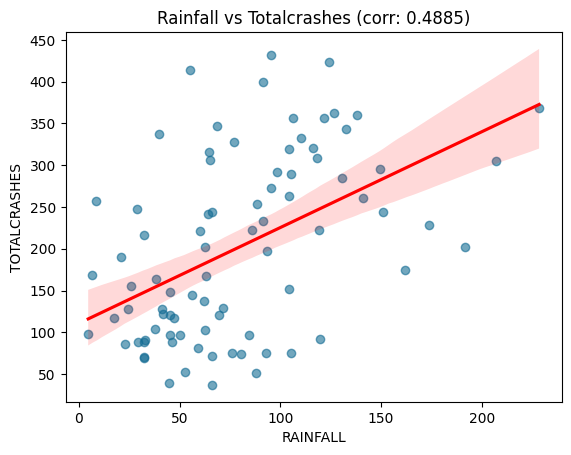

In [29]:
sns.regplot(data=merged_df, x='RAINFALL', y='TOTALCRASHES',
                scatter_kws = {"color": "#146C94", "alpha": 0.6},
                line_kws = {"color": "red"},
                ci = 95)

plt.title(f'Rainfall vs Totalcrashes (corr: {correlation:.4f})')
#plt.xlabel(col+' (°C)') 
#plt.ylabel('Total sales')